Краевая задача

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [145]:
left_cond_1 = {"x": 0, "U": 1}
right_cond_1 = {"x": 1, "U": 2.75}

In [146]:
class edge_problem:
    def __init__(self, p, q, f, left_cond, right_cond):
        self.p = p
        self.q = q
        self.f = f
        self.left_cond = left_cond
        self.right_cond = right_cond
    

In [147]:
def sign(a):
    if a > 0:
        return 1
    elif a < 0:
        return -1
    else:
        return 0
def bisection(f, search_area, e_x):
    start = search_area[0]
    finish = search_area[1]
    error_x = abs(finish - start)
    while error_x >= e_x:        
        med = (start + finish) / 2
        if f(med) == 0:
            return(med)
        elif sign(f(start)) != sign(f(med)):
            finish = med
        else:
            start = med
        error_x = abs(finish - start)
        print(start, finish)
        
    return (start + finish) / 2
            

In [213]:
class Shooting:
    def __init__(self, edge_problem):
        self.p = edge_problem.p
        self.q = edge_problem.q
        self.f = edge_problem.f
        self.left_cond = edge_problem.left_cond
        self.right_cond = edge_problem.right_cond
        self.x_band = (self.left_cond["x"], self.right_cond["x"])
    
    def two_dim_form(self, x, y):
        return np.array([-self.p(x) * y[0] - self.q(x) * y[1] + self.f(x), y[0]])  
    
    def two_dim_form_homogeneous(self, x, y):
        return np.array([-self.p(x) * y[0] - self.q(x) * y[1], y[0]])      
    
    def shoot(self, der_0, max_step=1e-3, plot=False, title='Shot'):
        y0 = np.array([der_0, self.left_cond["U"]])
        shot = scipy.integrate.solve_ivp(self.two_dim_form, self.x_band, y0, 
                                         method='RK45', max_step=max_step)
        if plot:
            plt.figure(figsize = [5, 5])
            plt.title(title)            
            plt.plot(shot.t, shot.y[1, :], label='Computed', linewidth=6)
            plt.grid()
            plt.xlabel('x')
            plt.ylabel('U')
        return(shot.y[1, -1])
    
    def solve(self, der1, der2, max_shot_step=1e-3, error_der=1e-2):
        search_area = np.array([der1, der2])
        U_b = self.right_cond["U"]
        found_der = bisection(lambda x: self.shoot(x, max_step=max_shot_step) - U_b, search_area, error_der) 
        self.shoot(found_der, plot=True, title='Solution')
    
    def solve_linear(self, der_general=1, der_particular=-1, max_shot_step=1e-3): 
        y0_general = np.array([der_general, self.left_cond["U"]])
        shot_general = scipy.integrate.solve_ivp(self.two_dim_form_homogeneous, self.x_band, 
                                                 y0_general, method='RK45', max_step=max_shot_step)
        y0_particular = np.array([der_particular, self.left_cond["U"]])
        shot_particular = scipy.integrate.solve_ivp(self.two_dim_form, self.x_band, 
                                                    y0_particular, method='RK45', max_step=max_shot_step)
        
        U_b = self.right_cond["U"]
        K = (U_b - shot_particular.y[1, -1]) / shot_general.y[1, -1]
        solution = {"x": shot_general.t, "y": K * shot_general.y[1, :] + shot_particular.y[1, :]}
        
        plt.figure(figsize = [5, 5])
        plt.title('Solution for linear equation')            
        plt.plot(solution["x"], solution["y"], label='Computed', linewidth=6)
        plt.grid()
        plt.xlabel('x')
        plt.ylabel('U')
        return solution
         

        

In [215]:
def f_2(x):
    return (1-np.log(x))/np.power(x, 3)
def q_2(x):
    return -1/np.square(x)/(1-np.log(x))
def p_2(x):
    return 1/x/(1-np.log(x))
left_cond_2 = {"x": 1, "U": 0}
right_cond_2 = {"x": 2, "U": (-3 + 6*np.log(2))/8}
print((-3 + 6*np.log(2))/8)
problem_2 = edge_problem(p_2, q_2, f_2, left_cond_2, right_cond_2)
shooting = Shooting(problem_2)

0.14486038541995894


In [216]:
def presize_solution_2(x):
    return np.log(x) - 0.25*x + (1 - 2*np.log(x))/(4*x)

0.16218906493395752

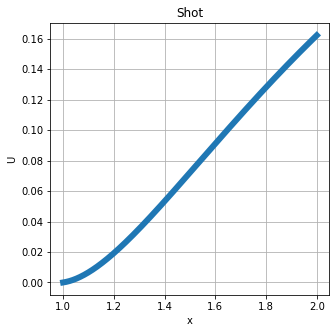

In [217]:

shooting.shoot(0.025, plot=True)

-0.025 0.0
-0.0125 0.0
-0.00625 0.0
-0.003125 0.0
-0.0015625 0.0
-0.00078125 0.0


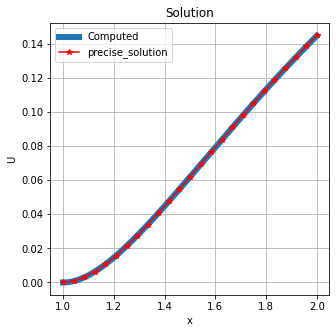

In [218]:
shooting.solve(-0.025, 0.025, max_shot_step=1e-2, error_der=1e-3)
x_band = np.linspace(1, 2, 25)
plt.plot(x_band, presize_solution_2(x_band), c='r', label='precise_solution', marker='*')
plt.legend()

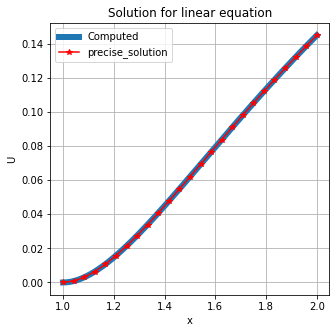

In [219]:
shooting.solve_linear(max_shot_step=1e-3)
x_band = np.linspace(1, 2, 25)
plt.plot(x_band, presize_solution_2(x_band), c='r', label='precise_solution', marker='*')
plt.legend()

In [172]:
def f_1(x):
    return 0
def p_1(x):
    return 0
def q_1(x):
    return -1
problem_1 = edge_problem(p_1, q_1, f_1, left_cond_1, right_cond_1)
shooting = Shooting(problem_1)

0.0 10
0.0 5.0
0.0 2.5
0.0 1.25
0.625 1.25
0.9375 1.25
0.9375 1.09375
1.015625 1.09375
1.015625 1.0546875
1.015625 1.03515625
1.025390625 1.03515625
1.025390625 1.0302734375
1.025390625 1.02783203125
1.026611328125 1.02783203125
1.026611328125 1.0272216796875
1.02691650390625 1.0272216796875
1.02691650390625 1.027069091796875
1.02691650390625 1.0269927978515625


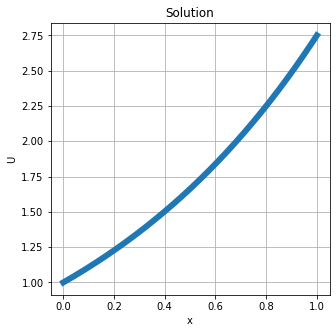

In [155]:
shooting.solve(-10, 10, error_der=1e-4)